In [1]:
# This script is used to run the detection script in the VBT module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')

if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f'Added {root_dir} to sys.path')


try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError:
    print("VBT module not found. Please check the module path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: C:\Users\timos\Desktop\BounceInsight
Root Directory exists: C:\Users\timos\Desktop
Added C:\Users\timos\Desktop to sys.path
Successfully imported BounceInsight


In [7]:
insight.analyse_bounce(id=None, plot=False)

Finished 10_slownb2.csv:  26%|██▌       | 202/787 [00:06<00:19, 29.26it/s]      

No turning point detected for file 10_fastnb3.csv. Skipping...


Finished 38_slowb3.csv:  93%|█████████▎| 733/787 [00:25<00:01, 30.01it/s]       

No turning point detected for file 38_fastnb1.csv. Skipping...


Finished 40_slownb3.csv: 100%|██████████| 787/787 [00:26<00:00, 29.39it/s]      

Number of bounce files in bounce_dict_70: 111
Number of bounce files in no_bounce_dict_70: 108
Number of bounce files in bounce_dict_80: 108
Number of bounce files in no_bounce_dict_80: 108
Number of bounce files in bounce_dict_slow: 89
Number of bounce files in no_bounce_dict_slow: 87
Number of bounce files in bounce_dict_fast: 88
Number of bounce files in no_bounce_dict_fast: 88


In [9]:
insight.validate(tolerance=0.2)

Results saved to validation/validation_results.csv
Visualized validation results saved to validation/validation_results.xlsx
Validation complete


Pos peaks before last crossing (5588): [273, 884, 1548, 2143, 4647, 5515]
Selected peak: 5515, t_con_force: 2039.7615415948976
Dip detected: False


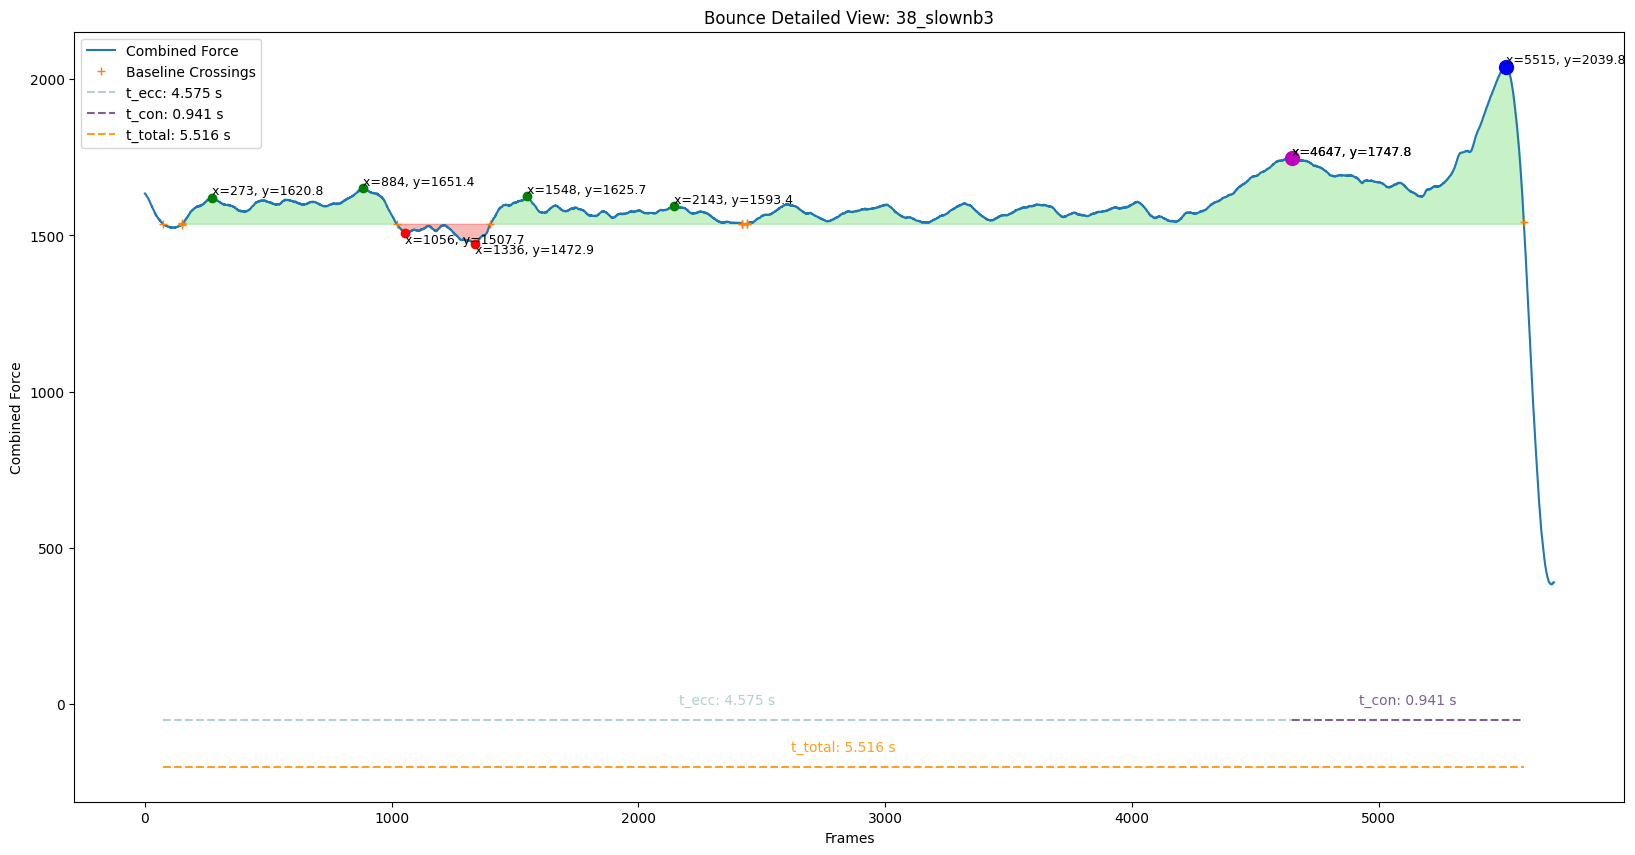

In [5]:
insight.plot_data(file_name='38_slownb3')

No turning point detected for file 10_fastnb3. Skipping...


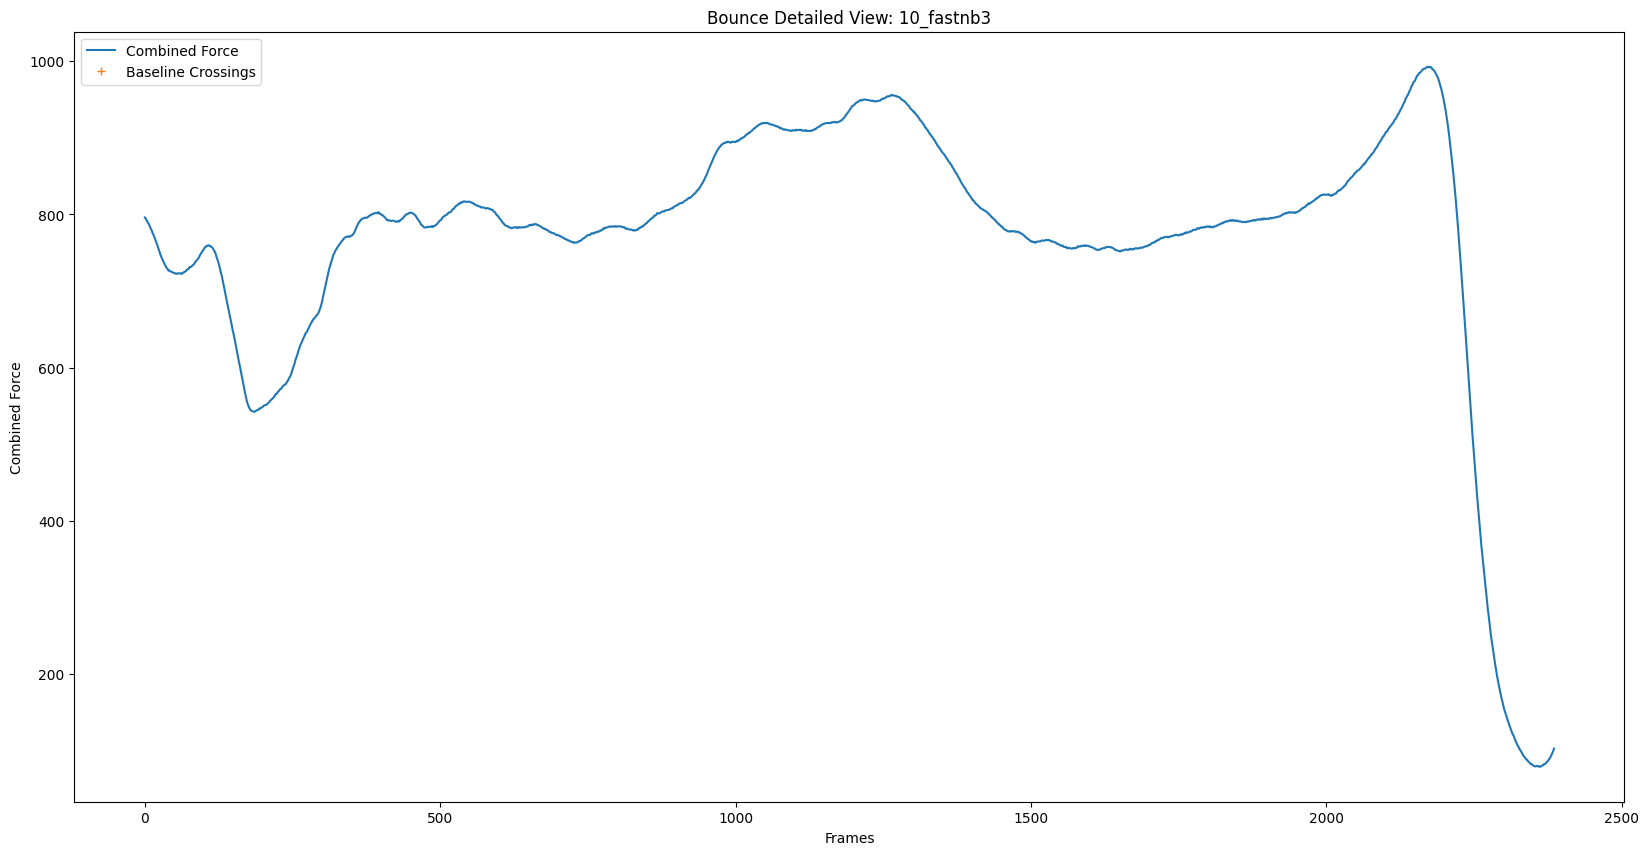

No turning point detected for file 38_fastnb1. Skipping...


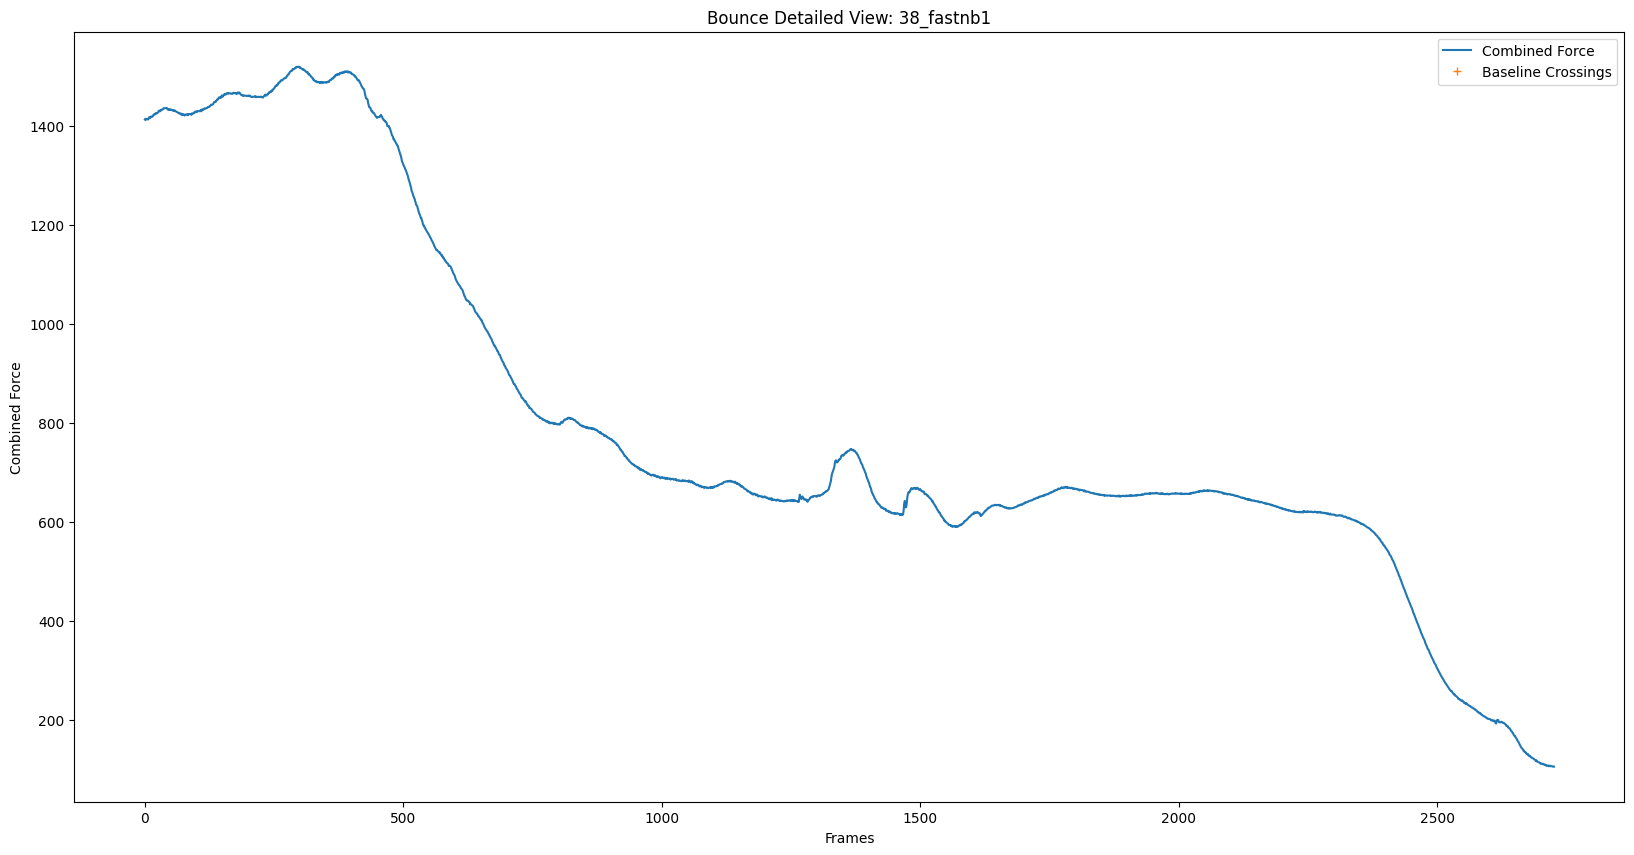

Pos peaks before last crossing (1946): [348, 983, 1873]
Selected peak: 1873, t_con_force: 2238.850881336344
Dip detected: True


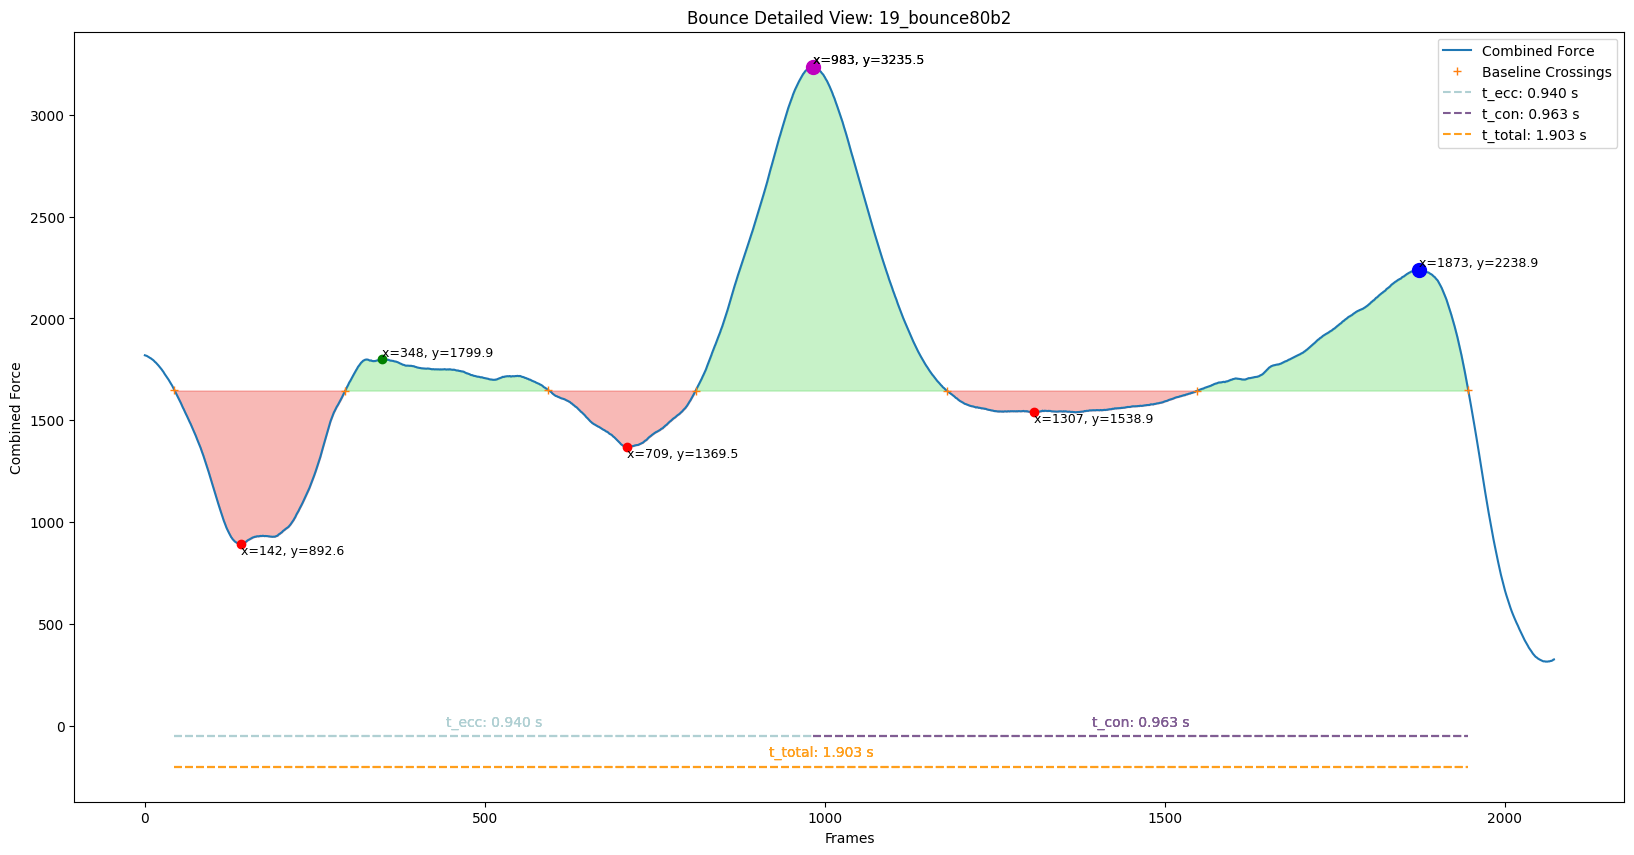

In [6]:
insight.plot_data(file_name='10_fastnb3')
insight.plot_data(file_name='38_fastnb1')
insight.plot_data(file_name='19_bounce80b2')

In [17]:
insight.run_statistics(analysis_type='summary')

Statistics for bounce70b:
t_ecc; Avg: 1.244, Std Dev: 0.335, Median: 1.130, Min: 0.711, Max: 2.267
t_con; Avg: 0.975, Std Dev: 0.190, Median: 0.959, Min: 0.657, Max: 1.682
t_total; Avg: 2.219, Std Dev: 0.477, Median: 2.088, Min: 1.432, Max: 3.601
turning_force; Avg: 2821.003, Std Dev: 663.356, Median: 2730.373, Min: 1678.597, Max: 4820.644


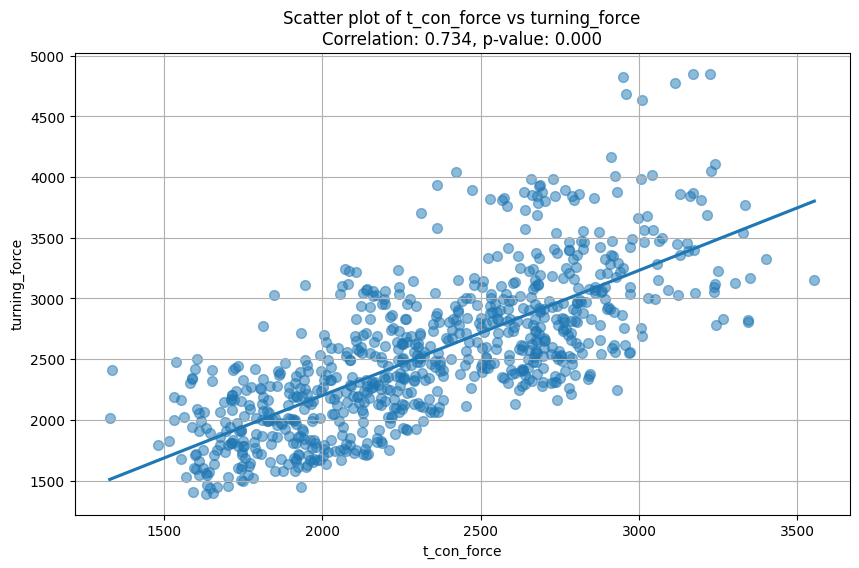

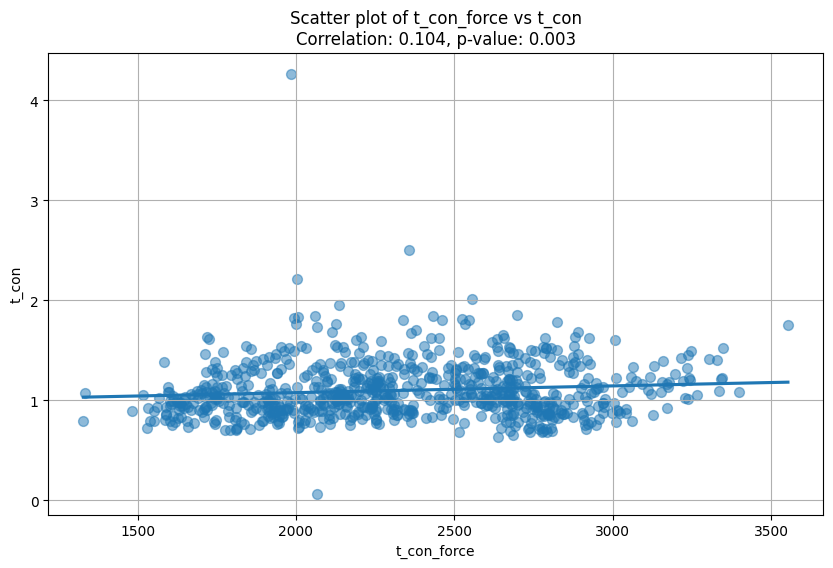

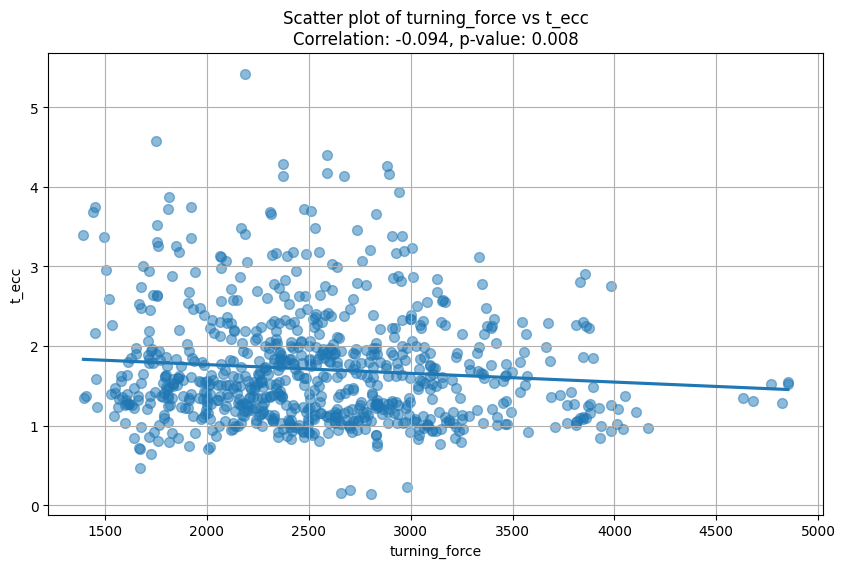

In [13]:
insight.run_statistics(analysis_type='cor', metric1='t_con_force', metric2='turning_force')
insight.run_statistics(analysis_type='cor', metric1='t_con_force', metric2='t_con')
insight.run_statistics(analysis_type='cor', metric1='turning_force', metric2='t_ecc')

----------------------------------------------------
Levene's test for homogeneity of variances: W=7.605, p-value=0.006
Homogeneity of variances assumption not met
Welch's ANOVA results for turning_force comparing bounce and nobounce:
Statistic      : 61.8895                 p-value        : 3.1506e-14


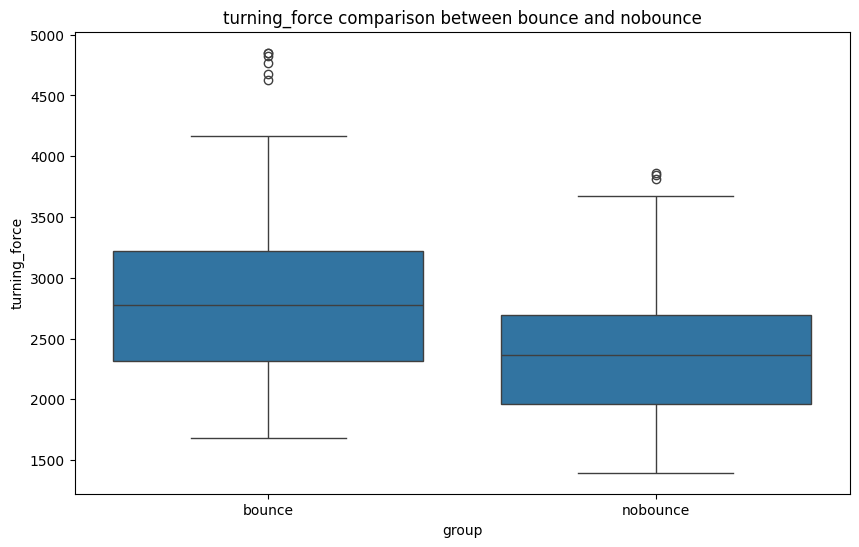

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.891, p-value=0.346
ANOVA results for turning_force comparing bounce and nobounce:
                sum_sq     df         F        PR(>F)
C(group)  1.824834e+07    1.0  70.73772  1.066461e-15
Residual  8.977421e+07  348.0       NaN           NaN


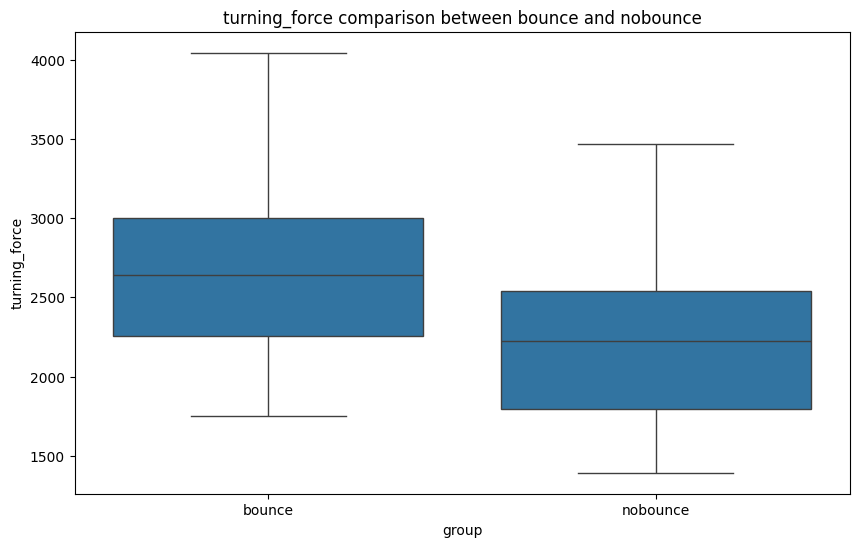

----------------------------------------------------
Levene's test for homogeneity of variances: W=7.382, p-value=0.007
Homogeneity of variances assumption not met
Welch's ANOVA results for turning_force comparing bounce and nobounce:
Statistic      : 126.2499                 p-value        : 3.1990e-27


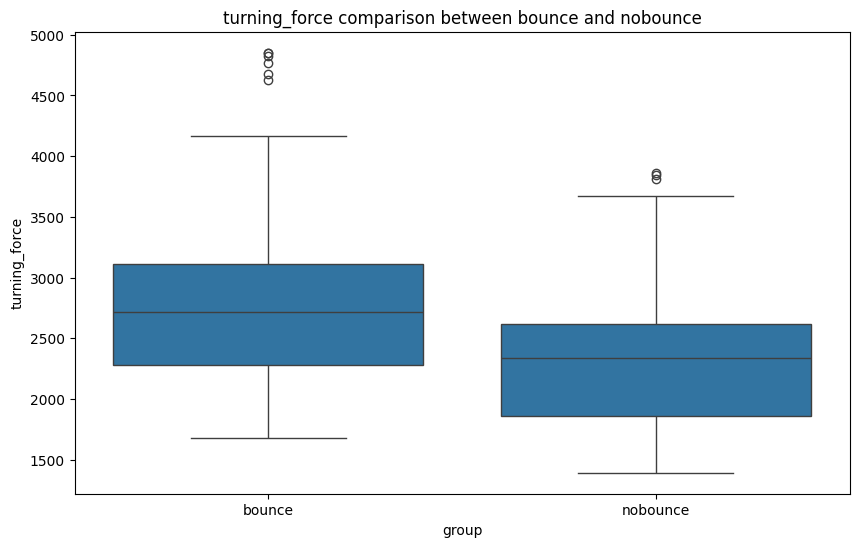

In [13]:
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_weight', metric='turning_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_speed', metric='turning_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_all', metric='turning_force')

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.418, p-value=0.518
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F   PR(>F)
C(group)  4.652379e+05    1.0  2.243801  0.13488
Residual  8.977982e+07  433.0       NaN      NaN


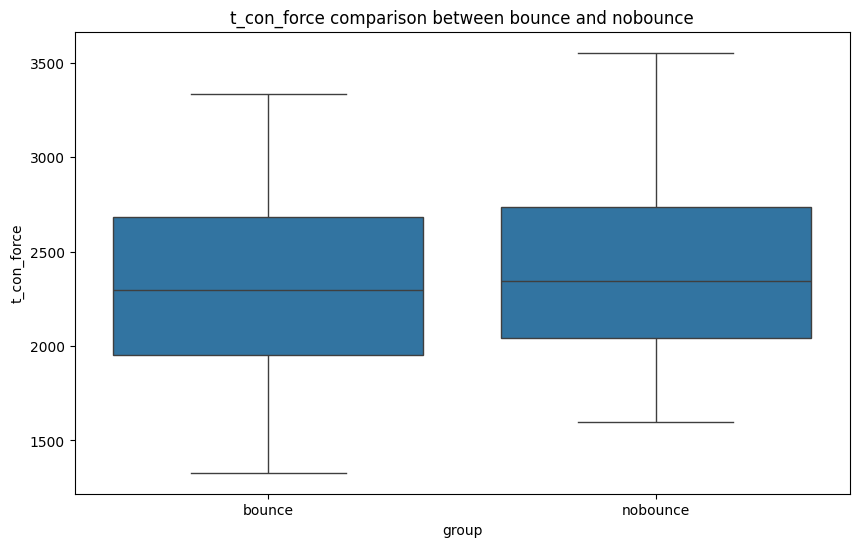

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.002, p-value=0.966
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  2.754048e+05    1.0  1.635518  0.201794
Residual  5.859972e+07  348.0       NaN       NaN


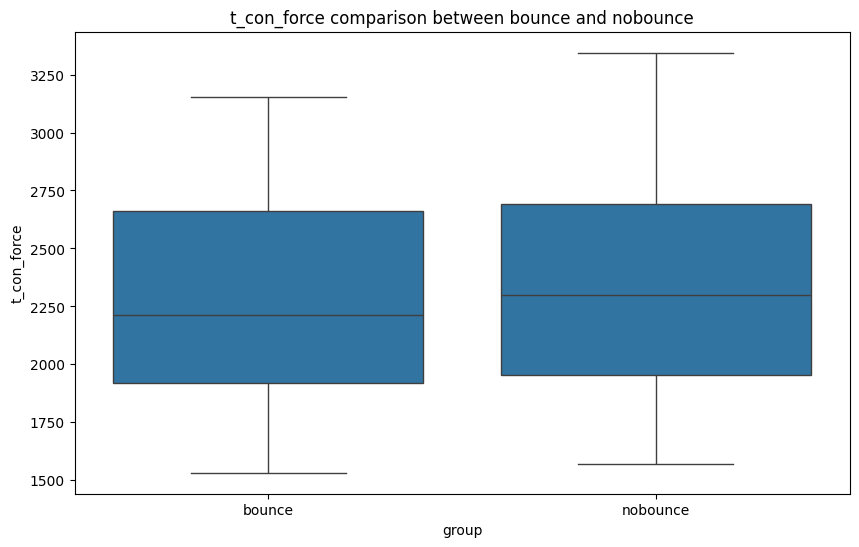

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.270, p-value=0.603
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  7.402846e+05    1.0  3.880736  0.049195
Residual  1.493641e+08  783.0       NaN       NaN


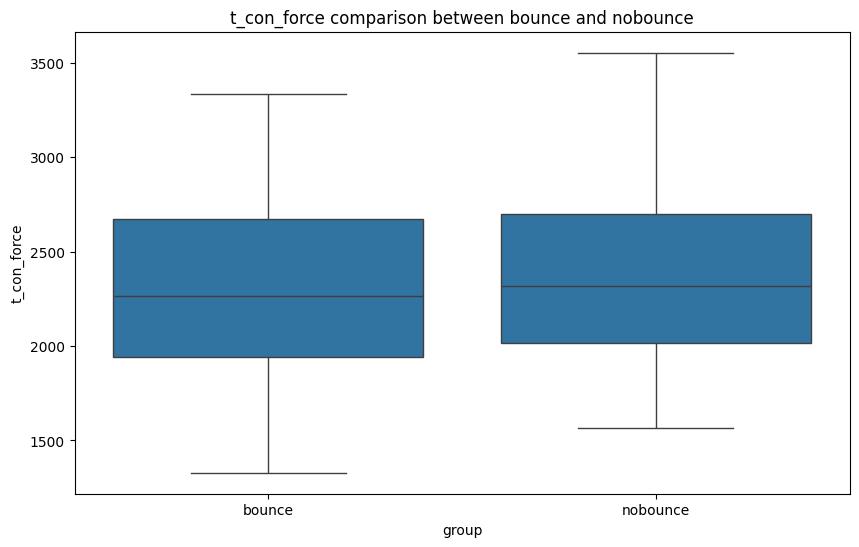

In [14]:
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_weight', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_speed', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_all', metric='t_con_force')

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: weightnb
ANOVA results for turning_force comparing bounce70nb and bounce80nb:
                sum_sq     df         F    PR(>F)
C(group)  6.585026e+05    1.0  2.266621  0.133662
Residual  6.217164e+07  214.0       NaN       NaN


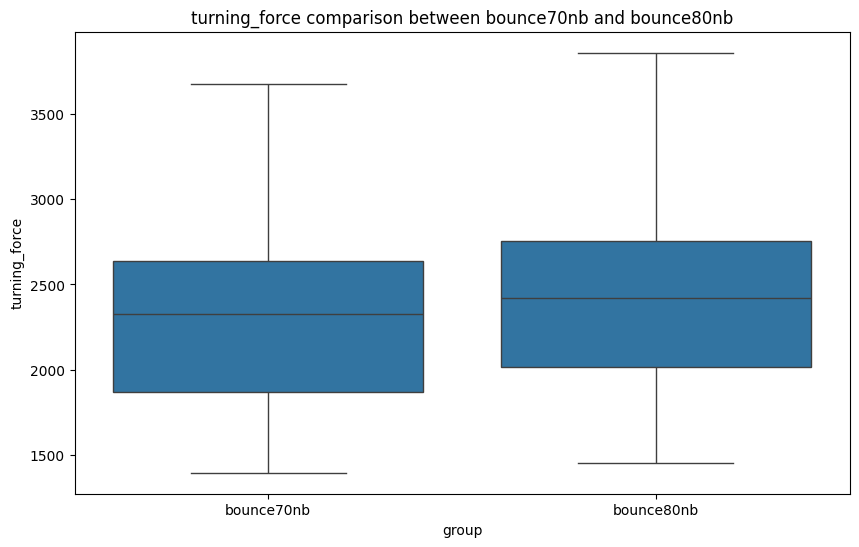

In [20]:
insight.run_statistics(analysis_type='anova', metric='turning_force', comparison_type='weightnb')

Contingency Table:
has_dip   False  True 
group                 
bounce      105    114
nobounce    191     25
Chi-Square Test:
Chi2: 80.10413429137292, p-value: 3.5518845654449827e-19, Degrees of Freedom: 1


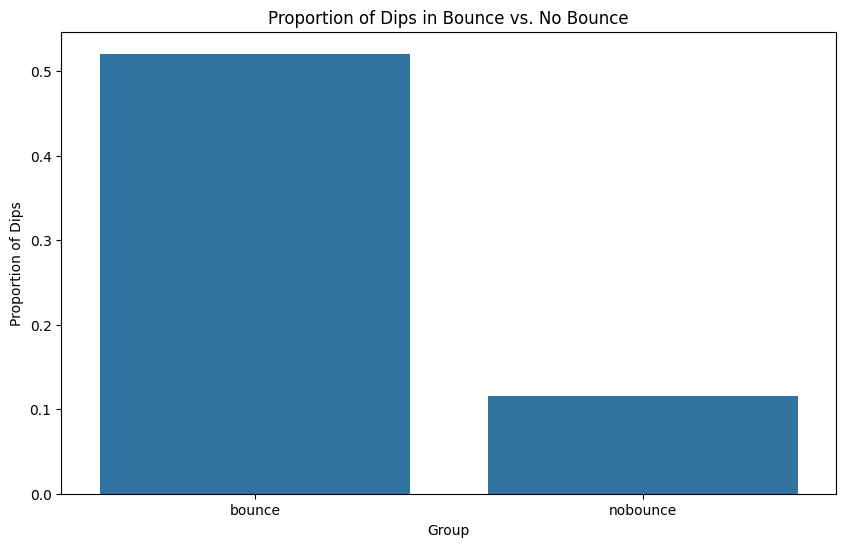

Missing 'has_dip' for file_id: 10_fastnb3.csv
Missing 'has_dip' for file_id: 38_fastnb1.csv
Contingency Table:
has_dip   False  True 
group                 
bounce       42    135
nobounce    148     25
Chi-Square Test:
Chi2: 132.25412551198957, p-value: 1.3164157672321235e-30, Degrees of Freedom: 1


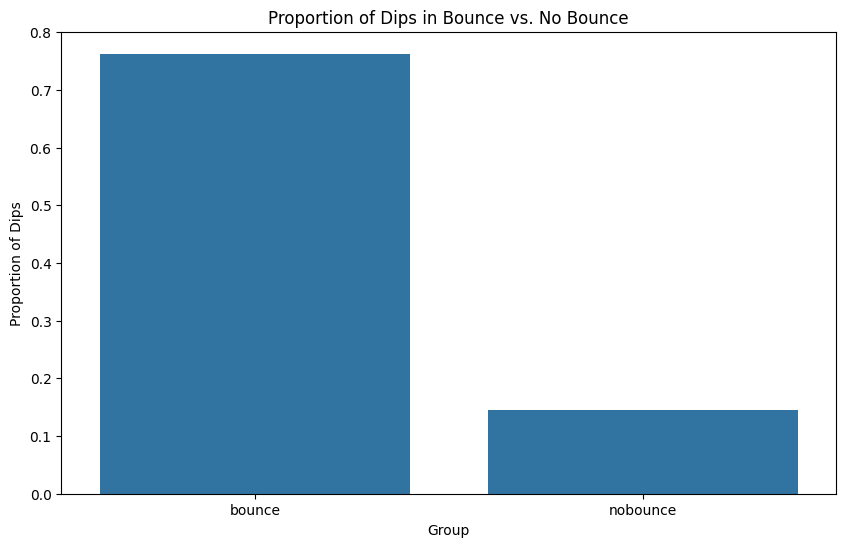

Missing 'has_dip' for file_id: 10_fastnb3.csv
Missing 'has_dip' for file_id: 38_fastnb1.csv
Contingency Table:
has_dip   False  True 
group                 
bounce      147    249
nobounce    339     50
Chi-Square Test:
Chi2: 206.13481358268712, p-value: 9.575830922489448e-47, Degrees of Freedom: 1


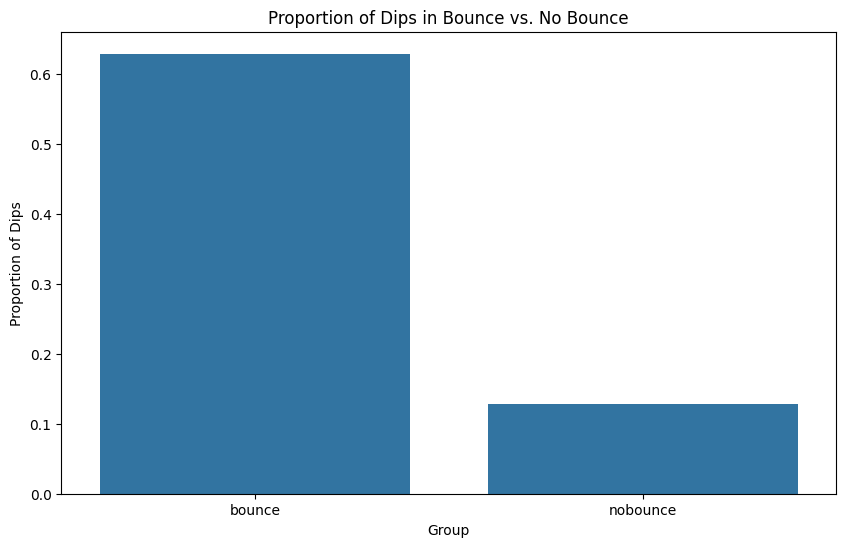

In [21]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_weight')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_speed')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_all')

In [15]:
insight.run_statistics(analysis_type='regression', metric='turning_force')

                            OLS Regression Results                            
Dep. Variable:          turning_force   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     291.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.12e-195
Time:                        11:47:22   Log-Likelihood:                -5691.4
No. Observations:                 785   AIC:                         1.140e+04
Df Residuals:                     778   BIC:                         1.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         389.5538     86.379      4.510      

In [24]:
insight.run_statistics(analysis_type='logit_regression', metric='turning_force')

                            OLS Regression Results                            
Dep. Variable:          turning_force   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     291.6
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          3.12e-195
Time:                        12:01:56   Log-Likelihood:                -5691.4
No. Observations:                 785   AIC:                         1.140e+04
Df Residuals:                     778   BIC:                         1.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         389.5538     86.379      4.510      

In [23]:
insight.run_statistics(analysis_type='repeated_anova', metric='turning_force')
insight.run_statistics(analysis_type='repeated_anova', metric='t_con_force')
insight.run_statistics(analysis_type='repeated_anova', metric='t_ecc')

Repeated Measures ANOVA for turning_force:
                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
condition 103.3348 5.0000 140.0000 0.0000

Repeated Measures ANOVA for t_con_force:
                 Anova
          F Value Num DF  Den DF  Pr > F
----------------------------------------
condition 11.3281 5.0000 140.0000 0.0000

Repeated Measures ANOVA for t_ecc:
                 Anova
          F Value Num DF  Den DF  Pr > F
----------------------------------------
condition 81.3670 5.0000 140.0000 0.0000

